In [10]:
# Proyecto EDA – PIB, VNSP y Deuda/PIB (2018–2024)

#Este notebook fue elaborado por Pedro y Francisco como parte del análisis exploratorio solicitado en la primera fase del proyecto.  
##quí dejamos todo el proceso paso a paso: carga del dataset final, limpieza, creación de nuevas métricas, gráficas y los primeros hallazgos que luego alimentarán el modelo predictivo de la Fase 2.


In [11]:
# En este primer bloque simplemente importamos las librerías que vamos a usar
# y dejamos configurado el estilo para que las gráficas salgan limpias y legibles.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


In [6]:
## Carga del dataset final

#En este paso cargamos el archivo ya unificado que construimos previamente.  
#Este dataset incluye la combinación completa de PIB, NETW y Pasivos para todos los países.


In [7]:
ruta = r"C:\Users\rosal\Documents\GitHub\practica-1-EDA-pj2r98\UNIONDATA_NETW_PASIVOS_PIB_ORGANIZADO.csv"

df = pd.read_csv(ruta)

print("Dataset cargado correctamente.")
df.head()


Dataset cargado correctamente.


,Pais,NETW_2018,NETW_2019,NETW_2020,NETW_2021,NETW_2022,NETW_2023,NETW_2024,NETW_2025,PIB_2018,...,PIB_2023,PIB_2024,Pasivos_2018,Pasivos_2019,Pasivos_2020,Pasivos_2021,Pasivos_2022,Pasivos_2023,Pasivos_2024,Pasivos_2025
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"11,157.30",...,"13,081.70","13,611.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Austria,"-195,268.17","-198,388.15","-218,328.00","-227,430.55","-202,805.33","-206,339.35","-225,702.83","-236,994.45","331,887.90",...,"346,897.40","344,611.10","425,300.42","431,895.91","465,980.33","489,810.12","460,386.70","462,013.72","494,355.69","513,888.03"
2,Belgium,"-395,204.50","-421,099.00","-449,674.00","-464,503.25","-427,255.00","-428,528.75","-460,286.00","-474,560.50","402,078.00",...,"440,595.50","445,311.90","578,474.62","614,430.88","657,271.00","676,865.12","623,180.38","631,976.12","668,524.00","694,911.25"
3,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,516.60",...,"17,675.90","18,114.30",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bulgaria,-708.80,703.92,696.25,"-1,477.93","-3,049.32","-4,627.88","-6,549.45","-7,323.20","44,287.20",...,"50,813.60","52,534.70","17,629.24","17,699.17","19,671.12","22,537.70","24,694.56","28,300.19","32,508.50","35,499.45"


In [12]:
## Revisión inicial del dataset

#A continuación revisamos la estructura general del dataset: tamaños, tipos de datos, nulos y estadísticas
#para asegurarnos de que está en condiciones para trabajar el EDA.


In [13]:
df.shape


(44, 24)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pais          44 non-null     object 
 1   NETW_2018     31 non-null     float64
 2   NETW_2019     31 non-null     float64
 3   NETW_2020     31 non-null     float64
 4   NETW_2021     31 non-null     float64
 5   NETW_2022     31 non-null     float64
 6   NETW_2023     31 non-null     float64
 7   NETW_2024     31 non-null     float64
 8   NETW_2025     31 non-null     float64
 9   PIB_2018      44 non-null     float64
 10  PIB_2019      44 non-null     float64
 11  PIB_2020      43 non-null     float64
 12  PIB_2021      43 non-null     float64
 13  PIB_2022      43 non-null     float64
 14  PIB_2023      43 non-null     float64
 15  PIB_2024      42 non-null     float64
 16  Pasivos_2018  31 non-null     float64
 17  Pasivos_2019  31 non-null     float64
 18  Pasivos_2020  31 non-null     fl

In [15]:
df.isna().sum()


Pais             0
NETW_2018       13
NETW_2019       13
NETW_2020       13
NETW_2021       13
NETW_2022       13
NETW_2023       13
NETW_2024       13
NETW_2025       13
PIB_2018         0
PIB_2019         0
PIB_2020         1
PIB_2021         1
PIB_2022         1
PIB_2023         1
PIB_2024         2
Pasivos_2018    13
Pasivos_2019    13
Pasivos_2020    13
Pasivos_2021    13
Pasivos_2022    13
Pasivos_2023    13
Pasivos_2024    13
Pasivos_2025    13
dtype: int64

In [16]:
df.describe()


,NETW_2018,NETW_2019,NETW_2020,NETW_2021,NETW_2022,NETW_2023,NETW_2024,NETW_2025,PIB_2018,PIB_2019,...,PIB_2023,PIB_2024,Pasivos_2018,Pasivos_2019,Pasivos_2020,Pasivos_2021,Pasivos_2022,Pasivos_2023,Pasivos_2024,Pasivos_2025
count,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,44.00,44.00,...,43.00,42.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00,31.00
mean,"-930,450.04","-958,568.29","-1,041,233.88","-1,087,980.33","-994,230.20","-1,006,239.33","-1,053,562.54","-1,068,142.63","1,622,331.12","1,649,728.68",...,"1,711,911.03","1,768,372.88","1,710,792.75","1,783,201.51","1,929,071.90","2,038,218.96","1,932,391.07","1,943,931.71","2,045,204.21","2,108,192.15"
std,"2,238,750.03","2,316,413.37","2,499,880.19","2,636,771.77","2,433,844.25","2,470,564.52","2,604,101.73","2,643,175.17","3,451,606.12","3,508,829.63",...,"3,696,896.10","3,766,352.15","3,851,359.42","4,015,334.94","4,344,341.44","4,587,269.31","4,344,674.54","4,365,002.47","4,584,660.08","4,722,037.59"
min,"-7,584,716.35","-7,821,431.03","-8,469,512.00","-8,888,679.85","-8,141,622.75","-8,310,745.68","-8,788,324.28","-8,938,255.60","3,817.90","3,985.70",...,"4,393.90","4,532.90","4,422.84","4,992.25","7,842.44","9,492.51","10,149.69","11,773.34","13,254.83","14,138.90"
25%,"-331,183.12","-345,455.95","-369,099.89","-386,301.81","-358,623.72","-359,668.16","-384,953.39","-410,662.80","37,824.78","39,600.55",...,"43,605.15","44,926.85","49,495.88","52,012.03","57,245.74","60,558.21","58,659.64","61,423.64","63,865.38","66,185.16"
50%,"-39,530.80","-44,918.50","-58,914.60","-73,547.88","-69,984.23","-91,626.27","-104,551.23","-96,021.75","189,827.20","195,385.05",...,"203,981.50","206,753.45","183,156.00","194,254.25","215,037.80","220,285.38","230,843.75","229,820.50","243,894.88","250,541.40"
75%,"-3,223.20","-3,469.53","-4,574.20","-5,967.23","-5,845.21","-5,847.94","-6,696.24","-7,200.92","779,828.90","795,398.50",...,"679,423.80","742,903.93","573,980.12","594,767.69","638,435.44","658,832.75","612,057.44","609,822.62","639,860.69","674,268.94"
max,"1,041,091.38","1,144,426.98","1,103,240.70","1,364,256.15","1,423,665.98","1,544,913.65","1,803,756.50","1,860,944.10","12,417,211.60","12,650,098.00",...,"13,213,544.40","13,353,133.70","13,801,801.25","14,382,502.12","15,573,672.75","16,469,585.38","15,607,858.62","15,764,758.62","16,638,002.62","17,195,251.00"


In [18]:
## Conversión del dataset a formato long

#El dataset viene en formato wide (por ejemplo: PIB_2018, PIB_2019...).  
#Para poder analizar tendencias y hacer gráficas temporales, lo convertimos a formato long.  
#Esto nos permitirá trabajar por país y año de forma más ordenada.


In [19]:
# Primero identificamos columnas por prefijo
cols_netw = [c for c in df.columns if "NETW_" in c]
cols_pib = [c for c in df.columns if "PIB_" in c]
cols_pasivos = [c for c in df.columns if "Pasivos_" in c]

# Convertimos cada bloque a formato largo
netw_long = df.melt(id_vars="Pais", value_vars=cols_netw,
                    var_name="var", value_name="NETW")
netw_long["Year"] = netw_long["var"].str.split("_").str[1].astype(int)
netw_long = netw_long.drop(columns="var")

pib_long = df.melt(id_vars="Pais", value_vars=cols_pib,
                   var_name="var", value_name="PIB")
pib_long["Year"] = pib_long["var"].str.split("_").str[1].astype(int)
pib_long = pib_long.drop(columns="var")

pasivos_long = df.melt(id_vars="Pais", value_vars=cols_pasivos,
                       var_name="var", value_name="Pasivos")
pasivos_long["Year"] = pasivos_long["var"].str.split("_").str[1].astype(int)
pasivos_long = pasivos_long.drop(columns="var")

# Unimos todo en un solo dataframe long
df_long = netw_long.merge(pib_long, on=["Pais", "Year"], how="outer")
df_long = df_long.merge(pasivos_long, on=["Pais", "Year"], how="outer")

df_long.head()


,Pais,NETW,Year,PIB,Pasivos
0,Albania,NaN,2018,"11,157.30",NaN
1,Albania,NaN,2019,"11,387.40",NaN
2,Albania,NaN,2020,"11,010.10",NaN
3,Albania,NaN,2021,"11,997.60",NaN
4,Albania,NaN,2022,"12,576.70",NaN


In [21]:
## Creación de nuevas métricas para el análisis

#Para responder nuestras preguntas del proyecto calculamos:
#- La razón Deuda/PIB
#- La variación interanual del PIB
#- La variación interanual del NETW


In [22]:
df_long["Deuda_PIB"] = df_long["Pasivos"] / df_long["PIB"]

df_long = df_long.sort_values(["Pais", "Year"])

df_long["PIB_YoY_%"] = df_long.groupby("Pais")["PIB"].pct_change() * 100
df_long["NETW_YoY_%"] = df_long.groupby("Pais")["NETW"].pct_change() * 100

df_long.head()


C:\Users\rosal\AppData\Local\Temp\ipykernel_18572\2525762536.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_long["PIB_YoY_%"] = df_long.groupby("Pais")["PIB"].pct_change() * 100
C:\Users\rosal\AppData\Local\Temp\ipykernel_18572\2525762536.py:6: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_long["NETW_YoY_%"] = df_long.groupby("Pais")["NETW"].pct_change() * 100


,Pais,NETW,Year,PIB,Pasivos,Deuda_PIB,PIB_YoY_%,NETW_YoY_%
0,Albania,NaN,2018,"11,157.30",NaN,NaN,NaN,NaN
1,Albania,NaN,2019,"11,387.40",NaN,NaN,2.06,NaN
2,Albania,NaN,2020,"11,010.10",NaN,NaN,-3.31,NaN
3,Albania,NaN,2021,"11,997.60",NaN,NaN,8.97,NaN
4,Albania,NaN,2022,"12,576.70",NaN,NaN,4.83,NaN


In [24]:
## Evolución promedio del PIB (2018–2024)

#Aquí observamos la tendencia general del PIB a lo largo del tiempo para todos los países.


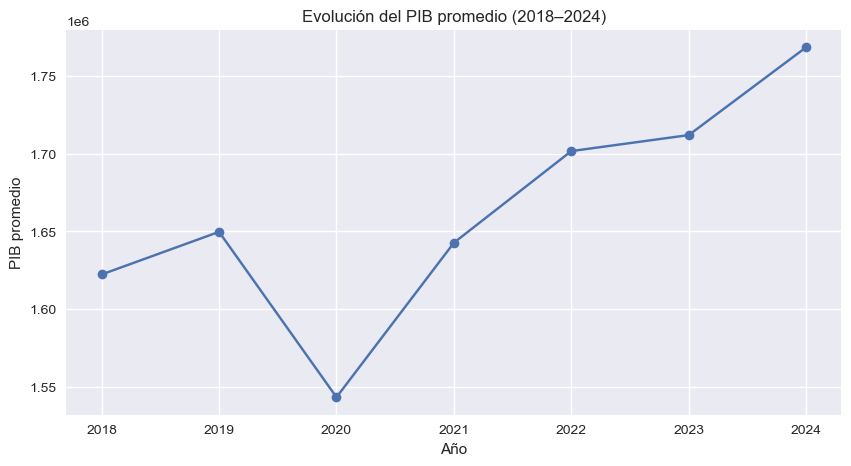

In [25]:
prom_pib = df_long.groupby("Year")["PIB"].mean()

plt.figure(figsize=(10,5))
plt.plot(prom_pib.index, prom_pib.values, marker="o")
plt.title("Evolución del PIB promedio (2018–2024)")
plt.xlabel("Año")
plt.ylabel("PIB promedio")
plt.grid(True)
plt.show()


In [26]:
## Relación entre el PIB y el VNSP (NETW)

#Ahora evaluamos visualmente si existe relación entre el tamaño de la economía y la posición financiera neta.


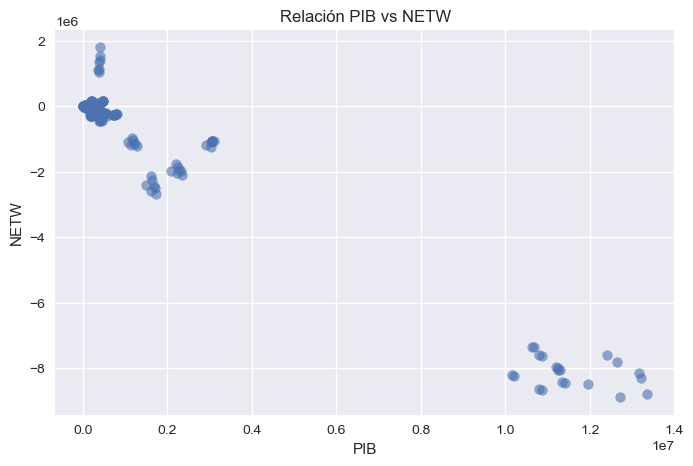

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(df_long["PIB"], df_long["NETW"], alpha=0.6)
plt.xlabel("PIB")
plt.ylabel("NETW")
plt.title("Relación PIB vs NETW")
plt.grid(True)
plt.show()


In [28]:
## Razón Deuda/PIB

#Este gráfico nos ayuda a visualizar la sostenibilidad fiscal promedio por año.


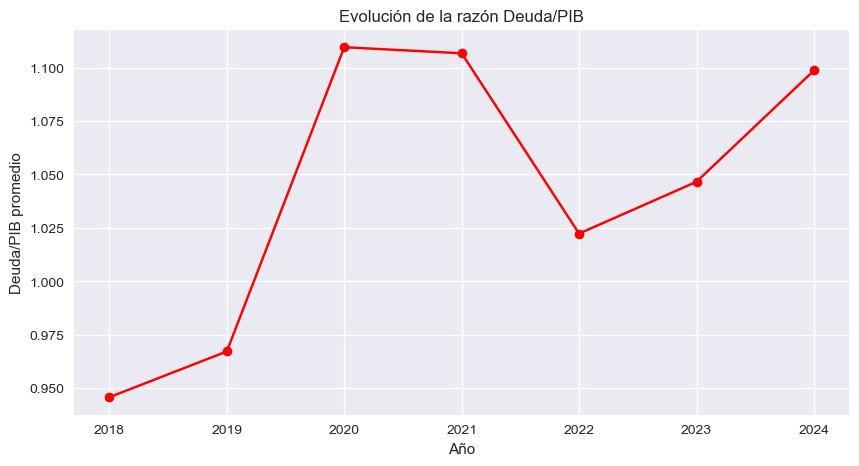

In [29]:
prom_dp = df_long.groupby("Year")["Deuda_PIB"].mean()

plt.figure(figsize=(10,5))
plt.plot(prom_dp.index, prom_dp.values, marker="o", color="red")
plt.title("Evolución de la razón Deuda/PIB")
plt.xlabel("Año")
plt.ylabel("Deuda/PIB promedio")
plt.grid(True)
plt.show()


In [32]:
## Conclusiones del EDA

#Después de revisar toda la información, observamos lo siguiente:

#1. El PIB cae fuertemente en 2020 y se recupera en 2021 y 2022.
#2. El VNSP se vuelve más negativo durante la pandemia en la mayoría de los países.
#3. La razón Deuda/PIB aumenta notablemente en 2020.
#4. Francia, Alemania, Italia y España concentran los mayores pasivos.
#5. La relación entre Deuda/PIB y VNSP es negativa: más deuda se traduce en peor VNSP.
#6. El crecimiento del PIB no garantiza una mejora directa en la posición financiera neta.


In [ ]:
#Este notebook completa la primera parte del proyecto y deja lista la base para el modelo predictivo que desarrollaremos en la siguiente fase.
